# Artificial Intelligence Course - Fall 1402
## Computer Assignment #2 - Reinforcement Learning
### produced by: Mohamad Amin Yousefi
#### SID: 810100236

# Table of Contents

- [Part 1: Value Iteration & Policy Iteration Algorithms](#1)
    - [َQuestion 1:](#1-0)
    - [َQuestion 2:](#1-1)
    - [َQuestion 3:](#1-12)
    - [َQuestion 4:](#1-2)
    - [َQuestion 5:](#1-3)
        - [Value Iteration](#1-3-1)
        - [Policy Iteration](#1-3-2)
    - [َQuestion 6:](#1-4)
        - [Value Iteration](#1-4-1)
        - [Policy Iteration](#1-4-2)
- [Part 2: Q-Learning Algorithm](#2)
    - [َQuestion 8:](#2-1)
    - [َQuestion 9:](#2-2)
    - [َQuestion 10:](#2-3)

In [131]:
# import
import numpy as np
import gym
import gymnasium
import pygame
import matplotlib.pyplot as plt
import random
import time
from PIL import Image
import matplotlib.colors as mcolors
from statistics import mean 

In [132]:
# Consts
FRAME_PER_SEC = 1
GAME_WINDOW_HEIGHT = 250
GAME_WINDOW_WIDTH = 250
TAXI_WINDOW_HEIGHT = 550
TAXI_WINDOW_WIDTH = 350
DISCOUNT = 0.9 

<a name='1'></a>
## Part 1: Value Iteration & Policy Iteration Algorithms

In [133]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array", desc=None, map_name="4x4", is_slippery=False)
env.reset()

(0, {'prob': 1})

you can see the environment in each step by render command :


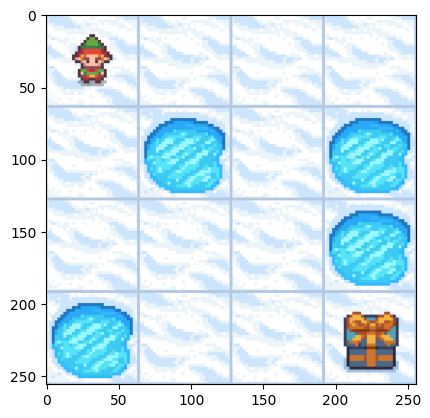

In [134]:
# get familiar with the environment
print("you can see the environment in each step by render command :")
pic = env.render()
plt.imshow(pic)
plt.show()

In [135]:
# Total no. of states
env.observation_space.n

16

In [136]:
# Total no. of actions
env.action_space.n

4

<a name='1-0'></a>
### Question 1:

Value iteration is an algorithm used in artificial intelligence to find an optimal policy for decision-making in a Markov Decision Process (MDP). The algorithm starts by initializing the value function for all states. Then, it iterates over all states and updates the value function using the Bellman equation, which calculates the expected long-term rewards for each state-action pair. This process is repeated until the values converge, meaning that the change in values becomes smaller than a predefined threshold ($\theta$).

Once the values have converged, the algorithm extracts the optimal policy by selecting the action with the highest expected value for each state. This policy represents the best actions to take in each state to maximize the expected long-term rewards. The algorithm then continues to iterate, updating the value function based on the new policy and extracting an improved policy until both the values and policy have converged to their optimal values.

Bellman equation used in value iteration:
$$ V^*(s) =  max_a\displaystyle\sum_{s'} \biggl[T(s,a,s') \Bigl( R(s,a,s')+\gamma V^*(s')\Bigr)\biggr]$$
$$ \pi^*(s) =  argmax_a Q^*(s,a)$$

<a name='1-1'></a>
### Question 2:

Since in value estimation, we have to go through all states and then check delta values, I have commented out the last two lines of the 'value_estimation' function. So when delta is less than theta, we don't immediately exit the 'for' loop on states, and we consider all states before deciding whether the function should continue or not.

In [137]:
class ValueIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))
        self.exec_counter = 0

    def value_estimation(self):
        self.delta = np.inf
        while(self.delta > self.theta):
            self.delta = 0
            for state in range(self.env.observation_space.n):
                v = self.state_values[state]
                for action in range(self.env.action_space.n):
                    action_value = 0
                    for probability, next_state, reward, done in self.env.P[state][action]:
                        action_value += (probability)*(reward+(self.discount_factor*self.state_values[next_state]))
                    self.q_values[state, action] = action_value
                self.state_values[state] = np.max(self.q_values[state,:])
                self.delta = np.max([self.delta, abs(v - self.state_values[state])])
                # if (self.delta < self.theta):
                #     break
            self.exec_counter += 1

    def take_action(self, action):
        next_state, reward, done, _ = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return np.argmax(self.q_values[state,:])

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state

<a name='1-12'></a>
### Question 3:

Policy iteration is an algorithm used in artificial intelligence to find the optimal policy for decision-making in a Markov Decision Process (MDP). The algorithm operates by iterating between two main steps: policy evaluation and policy improvement.

The algorithm begins by initializing an initial policy for all states. Then, in the policy evaluation step, the algorithm evaluates the value function under the current policy. This is done by iteratively updating the value function until it converges to the true values of the states given the policy.

Once the value function has converged, the algorithm proceeds to the policy improvement step. In this step, the algorithm improves the current policy by selecting the action with the highest expected value for each state. This updated policy is more optimal than the previous one as it takes into account the newly computed values.

The algorithm continues to alternate between policy evaluation and policy improvement until the policy has converged to the optimal policy. This occurs when no further improvements can be made, and the policy consistently selects actions that maximize the expected long-term rewards.

Bellman equation used in policy iteration:
$$ V^{\pi}(s) = \displaystyle\sum_{s'} \biggl[T(s,\pi(s),s') \Bigl( R(s,\pi(s),s')+\gamma V^{\pi}(s')\Bigr)\biggr]$$

<a name='1-2'></a>
### Question 4:

In [138]:
class PolicyIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))
        self.policy = np.random.randint(self.env.action_space.n, size=self.env.observation_space.n) # initial policy
        self.policy_stable = False
        self.exec_counter = 0

    def policy_evaluation(self):
        self.delta = np.inf
        while(self.delta >= self.theta):
            self.delta = 0
            for state in range(self.env.observation_space.n):
                v = self.state_values[state]
                new_state_value = 0
                for probability, next_state, reward, done in self.env.P[state][self.policy[state]]:
                    new_state_value += (probability)*(reward+(self.discount_factor*self.state_values[next_state]))
                self.state_values[state] = new_state_value
                self.delta = np.max([self.delta, abs(v - self.state_values[state])])


    def policy_improvement(self):
        self.policy_stable = True

        for state in range(self.env.observation_space.n):
            old_policy = self.policy[state]

            for action in range(self.env.action_space.n):

                action_value = 0
                for probability, next_state, reward, done in self.env.P[state][action]:
                    action_value += (probability)*(reward+(self.discount_factor*self.state_values[next_state]))
                self.q_values[state, action] = action_value

            self.policy[state] = np.argmax(self.q_values[state,:])

            if old_policy != self.policy[state]:
                self.policy_stable = False

    def policy_estimation(self):
        self.policy_stable = False
        while not self.policy_stable:
            self.policy_evaluation()
            self.policy_improvement()
            self.exec_counter += 1

    def take_action(self, action):
        next_state, reward, done, _ = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return self.policy[state]

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state

this function renders our game environment and makes it ready to be animated. 

In [139]:
def simulator(env,dispsurf): 
    state_image = Image.fromarray(env.render(),'RGB')
    state_image = pygame.image.fromstring(state_image.tobytes(), state_image.size, state_image.mode)
    dispsurf.blit(state_image,(0,0))
    pygame.display.update()
    time.sleep(FRAME_PER_SEC)

In [140]:
def plot_table_values(data, plot_label):
    fig, ax = plt.subplots()
    ax.axis('off')
    cmap = plt.cm.get_cmap('gray')
    heatmap = ax.imshow(data, cmap=cmap, vmin=0, vmax=1)
    for i in range(4):
        for j in range(4):
            ax.text(j, i, f"{data[i, j]:.3f}", ha='center', va='center', color='blue')
    cbar = fig.colorbar(heatmap)
    ax.set_title(plot_label)
    plt.show()

In [141]:
def plot_optimal_policy(data):
    moves = ["←", "↓", "→", "↑"]
    cmap = mcolors.ListedColormap(['black'])
    fig, ax = plt.subplots()
    ax.axis('off')
    heatmap = ax.imshow(data, cmap=cmap)
    for i in range(4):
        for j in range(4):
            ax.text(j, i, moves[data[i, j]], ha='center', va='center', color='white')
    ax.set_title("optimal policy")
    plt.show()

In [142]:
def simulate_frozen_lake_policy_itr(policy_itr_agent, current_state):
    done = 0
    window_surface = pygame.display.set_mode((GAME_WINDOW_HEIGHT, GAME_WINDOW_WIDTH))
    pygame.init()
    simulator(env,window_surface)
    while done == 0:
        current_action = policy_itr_agent.get_optimal_policy(current_state)
        current_state,_,done,_,_ = env.step(current_action)
        simulator(env,window_surface)
    pygame.quit()

In [143]:
def simulate_frozen_lake_value_itr(value_itr_agent,current_state):
    done = 0
    window_surface = pygame.display.set_mode((GAME_WINDOW_HEIGHT, GAME_WINDOW_WIDTH))
    pygame.init()
    simulator(env,window_surface)
    while done == 0:
        current_action = value_itr_agent.get_optimal_policy(current_state)
        current_state,_,done,_,_ = env.step(current_action)
        simulator(env,window_surface)
    pygame.quit()

<a name='1-3'></a>
### Question 5:

<a name='1-3-1'></a>
#### Value Iteration:

In this section, first, I plotted the initial values of states, and then I plotted the values of states after the last iteration. Finally, I plotted the optimal policy achieved by value iteration.

C:\Users\HI\AppData\Local\Temp\ipykernel_1488\2726421043.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gray')


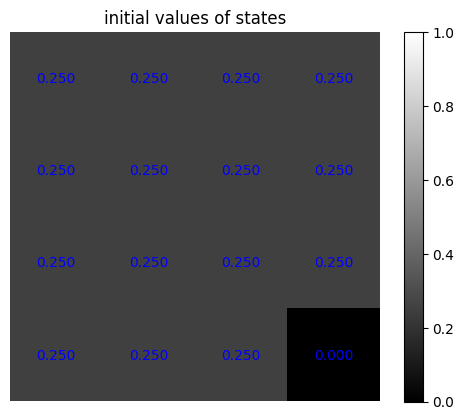

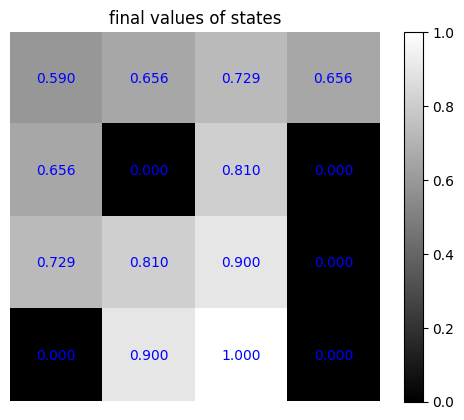

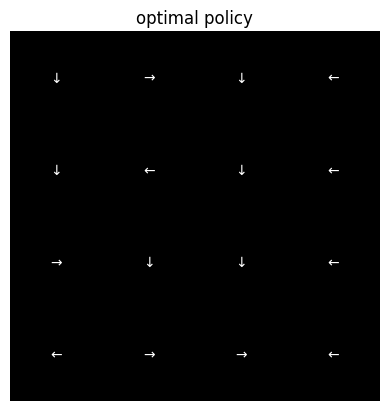

C:\Users\HI\AppData\Roaming\Python\Python311\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [144]:
value_iteration_agent=ValueIteration(env=env,discount_factor=DISCOUNT)

plot_table_values(value_iteration_agent.state_values.reshape((4,4)),"initial values of states")
initial_state, _ = value_iteration_agent.reset()

VI_all_episodes_time = [0] * 100
VI_all_episodes_exec_iterations = [0] * 100
for episode in range(100):
    start_time = time.time()
    value_iteration_agent=ValueIteration(env=env,discount_factor=DISCOUNT)
    value_iteration_agent.value_estimation()
    end_time = time.time()
    VI_all_episodes_time[episode] = end_time - start_time
    VI_all_episodes_exec_iterations[episode] = value_iteration_agent.exec_counter


plot_table_values(value_iteration_agent.state_values.reshape((4,4)),"final values of states")
policy = np.array([value_iteration_agent.get_optimal_policy(x) for x in range(value_iteration_agent.env.observation_space.n)])
plot_optimal_policy(policy.reshape((4,4)))
simulate_frozen_lake_value_itr(value_iteration_agent, initial_state)

<a name='1-3-2'></a>
#### Policy Iteration:

In this section, first, I plotted the values of states after the last iteration. Finally, I plotted the optimal policy achieved by policy iteration.

C:\Users\HI\AppData\Local\Temp\ipykernel_1488\2726421043.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gray')


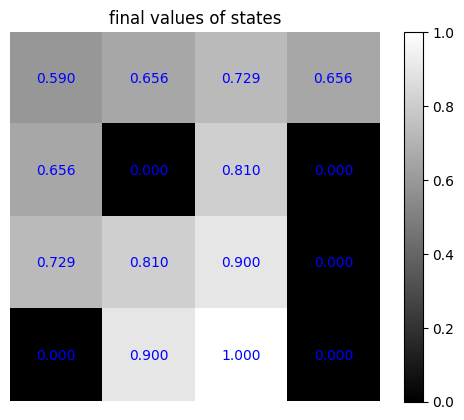

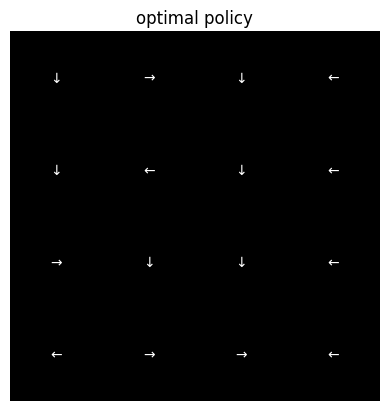

In [145]:
policy_iteration_agent = PolicyIteration(env=env,discount_factor = DISCOUNT)
initial_state,_ = value_iteration_agent.reset()

PI_all_episodes_time = [0] * 100
PI_all_episodes_exec_iterations = [0] * 100
for episode in range(100):
    start_time = time.time()
    policy_iteration_agent=PolicyIteration(env=env,discount_factor = DISCOUNT)
    policy_iteration_agent.policy_estimation()
    end_time = time.time()
    PI_all_episodes_time[episode] = end_time - start_time
    PI_all_episodes_exec_iterations[episode] = policy_iteration_agent.exec_counter

plot_table_values(policy_iteration_agent.state_values.reshape((4,4)), "final values of states")
plot_optimal_policy(policy_iteration_agent.policy.reshape((4,4)))
simulate_frozen_lake_policy_itr(policy_iteration_agent, initial_state)

<a name='1-4'></a>
### Question 6:

#### comparison between two algorithms:
Policy Consistency:
The policy is the same for both value iteration and policy iteration. This means that the policy being followed by the agent remains constant.

State Values:
The state values obtained from value iteration and policy iteration differ. This difference is attributed to the distinct approaches and convergence criteria of these two methods. The accuracy of policy iteration in calculating state values is noted as lower than that of value iteration. This lower accuracy can lead to differences in the state values obtained. but in this example, we can't notice this difference since our environment is too simple and easy to learn.

Convergence Criterion:
Policy iteration's convergence criterion is policy stability, which means it may converge even when state values are not very accurate. This is in contrast to value iteration, which focuses on finding the optimal value function directly.

policy iteration has less steps than value iteration. as you can see, in average, policy iteration has about 6 steps but value iteration has 141 steps, but in policy iteration, each step needs more computations than value iteration, so our steps in value iteration is about 20 times more than policy iteration but value iteration execution time is just 2 times more than policy iteration's execution time.

<a name='1-4-1'></a>
#### Value Iteration:

In [146]:
print(f"average execution time in value iteration: {mean(VI_all_episodes_time):.5f} and average iteration numbers is {mean(VI_all_episodes_exec_iterations)}")

average execution time in value iteration: 0.05489 and average iteration numbers is 141


<a name='1-4-2'></a>
#### Policy Iteration:

In [147]:
print(f"average execution time in policy iteration: {mean(PI_all_episodes_time):.5f} and average iteration numbers is {mean(PI_all_episodes_exec_iterations)}")

average execution time in policy iteration: 0.02530 and average iteration numbers is 6.36


<a name='2'></a>
## Part 2: Q-Learning Algorithm

In [148]:
# hyperparameters
REPS = 20
EPISODES = 2000
STUDENT_NUM = 236
MAX_EPSILON = 0.3
MIN_EPSILON = 0.1
DECAY_EPSILON_RATE = 1/EPISODES
MAX_LEARNING_RATE = 0.1
MIN_LEARNING_RATE = 0.01
DECREASE_LEARNING_RATE = 10/EPISODES

In [149]:
# environment
env = gym.make('Taxi-v3', render_mode="rgb_array")
Initial_State,_ = env.reset(seed=STUDENT_NUM)
Initial_State

411

In [150]:
taxi_row, taxi_col, pass_idx, dest_idx = env.decode(Initial_State)
taxi_row, taxi_col, pass_idx, dest_idx

(4, 0, 2, 3)

you can see the environment in each step by render command :


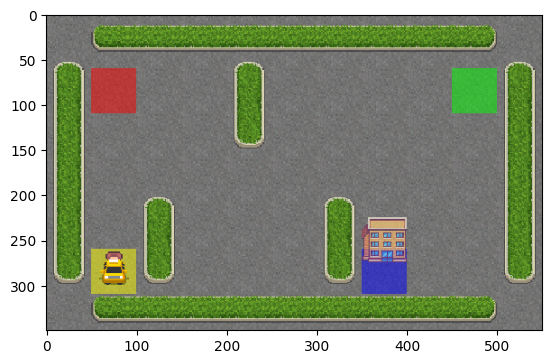

In [151]:
# get familiar with the environment
print("you can see the environment in each step by render command :")
plt.imshow(env.render())
plt.show()

In [152]:
# Total no. of states
env.observation_space.n

500

In [153]:
# Total no. of actions
env.action_space.n

6

<a name='2-1'></a>
### Question 7:

Q-learning is a  reinforcement learning algorithm mostly for decision-making in a model-free way and in environments with rewards, so it estimates the value of actions in specific states. by iterating over states and updating values using observed rewards and predictions of future states, the algorithm heads to optimize its policy. By updating values and searching around the environment, Q-learning enables our agent to do it's best in an specific environment. Q-values are calculated by:

$$ Q(s,a) = (1-\alpha)Q(s,a) + \alpha[R(s,a,s')+ \gamma  max_{a'}Q(s',a')]  $$

or

$$ Q(s,a) = Q(s,a) + \alpha[R(s,a,s')+ \gamma  max_{a'}Q(s',a') - Q(s,a)]$$

I used second form of this equation.

<a name='2-1'></a>
### Question 8:

in ```decay_epsilon()``` and ```decrease_learning_rate()``` I had several choices such as linear decay and exponensial policies. I have choosen exponential policy due to it's higher accuracy. note that in process of finding the best policy, chat gpt was used. the formula which is used in these functions is as below:
$$length_x = max_x - min_x$$
$$min_x + length_x \cdot e^{-decay\_rate_x  *  episode}$$
in ```decrease_learning_rate()```, x is replaced with alpha and in ```decay_epsilon()```, x is replaced with epsilon.

In [154]:
class QLearningAgent():
    def __init__(self, env, epsilon, learning_rate, discount_factor, seed):
      self.env = env
      self.epsilon = epsilon
      self.learning_rate = learning_rate
      self.olr = learning_rate
      self.discount_factor = discount_factor
      self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
      self.seed = seed

    def choose_action(self, state):
      action=self.get_optimal_policy(state)
      if random.random() < self.epsilon:
        actions = list(range(self.env.action_space.n))
        actions.remove(action)
        action=random.choice(actions)
      return action

    def update_q_table(self, state, action, nextState, reward):
      self.q_table[state][action] += self.learning_rate * (reward + self.discount_factor * max(self.q_table[nextState]) - self.q_table[state][action])

    def decay_epsilon(self, episode):
      self.epsilon = MIN_EPSILON + (MAX_EPSILON - MIN_EPSILON) * np.exp(-DECAY_EPSILON_RATE * episode)

    def decrease_learning_rate(self, episode):
      self.learning_rate = MIN_LEARNING_RATE + (MAX_LEARNING_RATE - MIN_LEARNING_RATE) * np.exp(-DECREASE_LEARNING_RATE * episode)

    def take_action(self, action):
      next_state, reward, done, _,_ = self.env.step(action)
      return next_state, reward, done

    def get_optimal_policy(self, state):
      return np.argmax(self.q_table[state])

    def get_q_values(self):
      return self.q_table

    def reset(self):
      # self.learning_rate = self.olr
      return self.env.reset(seed=self.seed)
    
    def run_one_repetition(self, decrease_learning_rate_flag):
      rep_rewards = [0] * EPISODES
      rep_exec_time = [0] * EPISODES
      for episode in range(EPISODES):
        start_time = time.time()
        curr_state, _ = env.reset(seed=STUDENT_NUM)
        done = 0
        episode_reward = 0
        while done == 0:
            choosen_action = self.choose_action(curr_state)
            next_state, action_reward, done = self.take_action(choosen_action)
            episode_reward += action_reward
            self.update_q_table(curr_state, choosen_action, next_state, action_reward)
            self.decay_epsilon(episode)
            if decrease_learning_rate_flag:
                self.decrease_learning_rate(episode)
            curr_state = next_state
            if done:
                break
        end_time = time.time()
        rep_exec_time[episode] = end_time - start_time
        rep_rewards[episode] = episode_reward
      return rep_rewards, rep_exec_time
        


In [155]:
def vertical_matrix_mean(matrix):
    matrix_mean = [None] * EPISODES
    for column in range(EPISODES):
        column_mean = 0
        for row in range(REPS):
            column_mean += matrix[row][column]
        matrix_mean[column] = column_mean / REPS
    return matrix_mean

In [163]:
def plot_Q_learning_comparison(constant_LR, decreasing_LR, plot_title, x_axis_title, y_axis_title):
    x = list(range(1, len(constant_LR) + 1))
    plt.title(plot_title)
    plt.scatter(x, decreasing_LR, label="decreasing LR")
    plt.scatter(x, constant_LR, label="constant LR")
    plt.legend()
    plt.xlabel(x_axis_title)
    plt.ylabel(y_axis_title)
    plt.xlim([0, 100])
    plt.grid()
    plt.show()

<a name='2-2'></a>
### Question 9:

know I have implemented training function and run it in two ways, with constant and decreasing Learning-Rate.

In [157]:
def train_Q_learning_agent(decrease_learning_rate_flag=False):
    agent = QLearningAgent(env, MAX_EPSILON, MAX_LEARNING_RATE, DISCOUNT, STUDENT_NUM)
    all_exec_time = []
    all_rewards = []
    for rep in range(REPS):
        agent = QLearningAgent(env,MAX_EPSILON, MAX_LEARNING_RATE, DISCOUNT,STUDENT_NUM)
        rep_rewards, rep_exec_time= agent.run_one_repetition(decrease_learning_rate_flag)
        all_rewards.append(rep_rewards)
        all_exec_time.append(rep_exec_time)
    return agent, all_rewards, all_exec_time

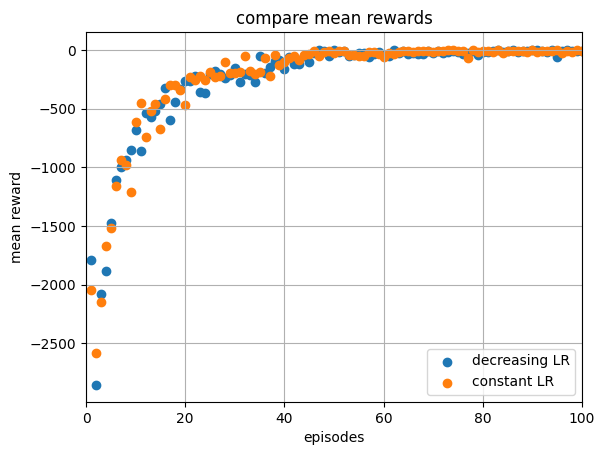

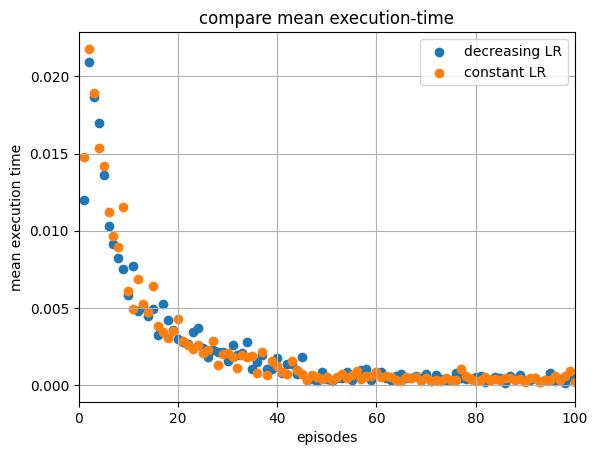

In [164]:
best_agent_constant_LR, rewards_matrix_with_constant_LR, exec_time_matrix_with_constant_LR = train_Q_learning_agent(False)
best_agent_decreasing_LR, rewards_matrix_with_decreasing_LR, exec_time_matrix_with_decreasing_LR = train_Q_learning_agent(True)
plot_Q_learning_comparison(vertical_matrix_mean(rewards_matrix_with_constant_LR), vertical_matrix_mean(rewards_matrix_with_decreasing_LR), "compare mean rewards", "episodes", "mean reward")
plot_Q_learning_comparison(vertical_matrix_mean(exec_time_matrix_with_constant_LR), vertical_matrix_mean(exec_time_matrix_with_decreasing_LR), "compare mean execution-time", "episodes", "mean execution time")

mean reward with decreasing learning-rate converges a little faster than mean reward using constants learning-rate and also according to their execution time plot, we can see that execution time with decreasing learning-rate converges a little faster than using constants learning-rate. this must happen in theory but in these plots we can't notice this defference becuase it's too small.

<a name='2-3'></a>
### Question 10:

simulation of agent with decreasing learning-rate.

In [159]:
def simulate_taxi(taxi_agent,current_state):
    done = 0
    window_surface = pygame.display.set_mode((TAXI_WINDOW_HEIGHT, TAXI_WINDOW_WIDTH))
    pygame.init()
    simulator(env,window_surface)
    while done == False:
        current_action = taxi_agent.get_optimal_policy(current_state)
        current_state,_,done,_,_ = env.step(current_action)
        simulator(env,window_surface)
    pygame.quit()

In [160]:
initial_state, _ = best_agent_constant_LR.reset()
simulate_taxi(best_agent_constant_LR, initial_state)